In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib.lines import Line2D

plt.rcParams["font.family"] = "Arial"
plt.rcParams['legend.title_fontsize'] = 7
plt.rcParams["text.usetex"] = True

SAVE = True

base_dir = os.path.abspath("..")
results_dir = os.path.join(base_dir, "..", "results")
figures_dir = os.path.join(base_dir, "..", "figures")

gen_refs = pd.read_csv(os.path.join(results_dir, f"merged_gen_refs_vanilla_gpt-4_unique.csv"))
intro_refs = pd.read_csv(os.path.join(results_dir, f"merged_intro_refs_vanilla_gpt-4_unique.csv"))

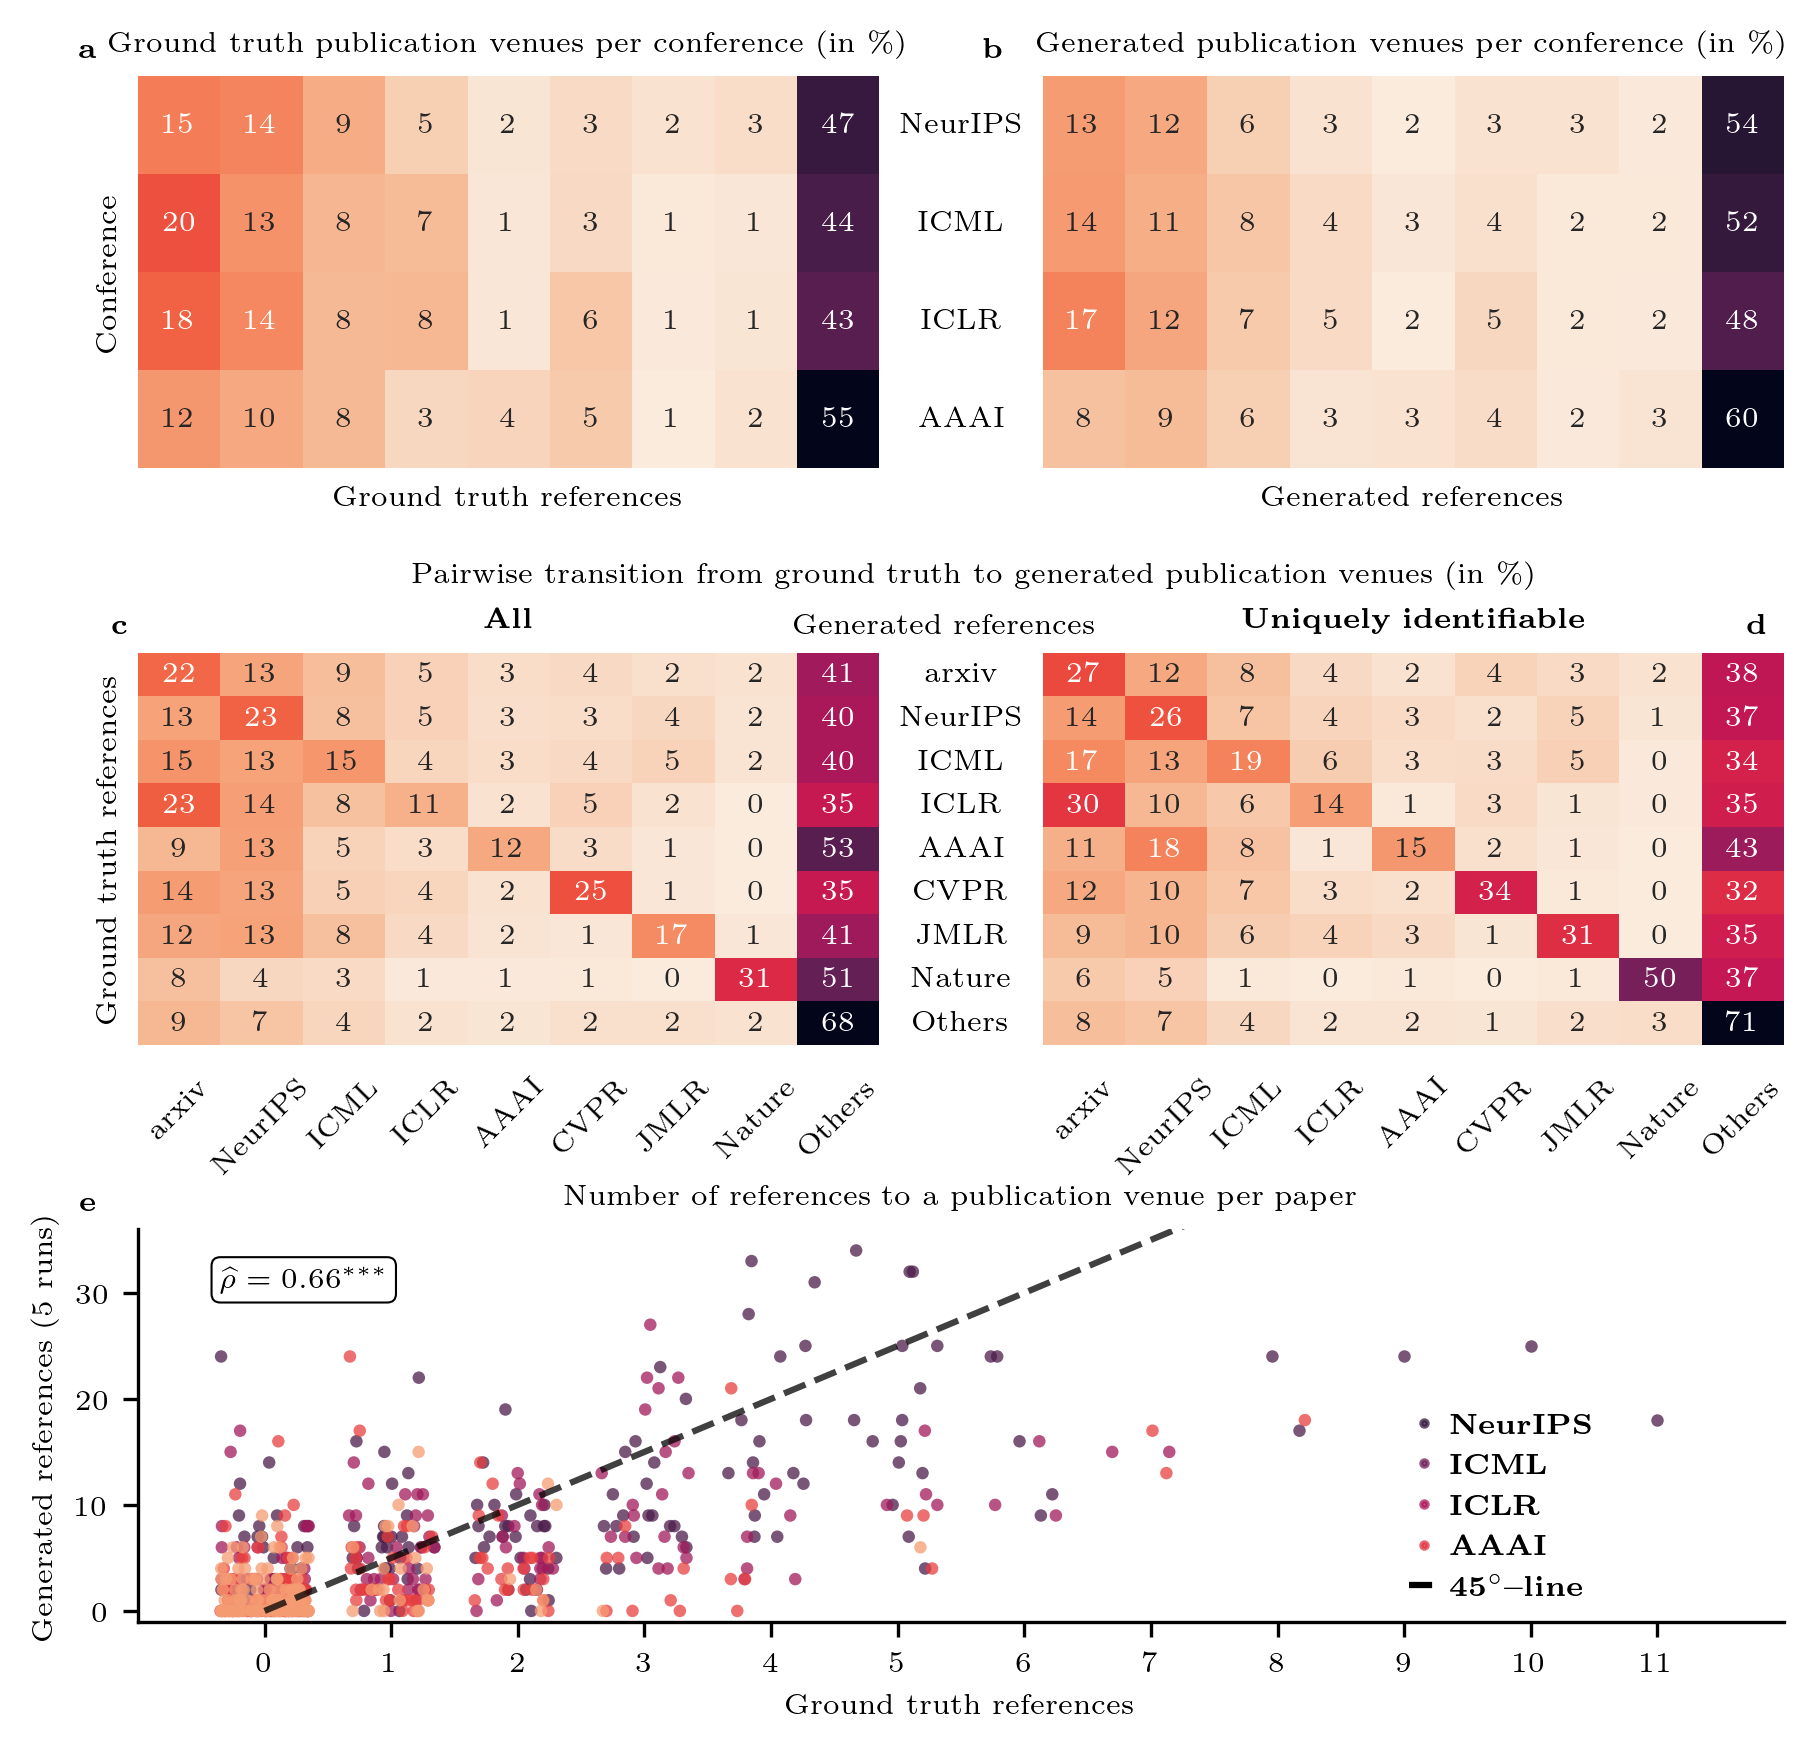

In [2]:
# Extended Data Figure 4
Figure1, ax1 = plt.subplot_mosaic(
    [["A", "C"], ["E", "B"], ["F", "F"]],
    figsize=(7.08,6.69),
    dpi=300,
    gridspec_kw={'wspace': 0.22, 'hspace': 0.47}
)

VENUES = ['arxiv', 'NeurIPS', 'ICML', 'ICLR', 'AAAI', 'CVPR', 'JMLR', 'Nature']
intro_refs.loc[~intro_refs["Publication Venue_processed"].isin(VENUES), "Publication Venue_processed"] = "Others"
gen_refs.loc[~gen_refs["Publication Venue_processed"].isin(VENUES), "Publication Venue_processed"] = "Others"

df = pd.concat([intro_refs["Publication Venue_processed"], gen_refs["Publication Venue_processed"]], axis=1)
df.columns = ["Intro", "Generated"]

df_intro = pd.concat([intro_refs["Conference"], intro_refs["Publication Venue_processed"]], axis=1)
df_intro.columns = ["Conference", "References"]

df_gen = pd.concat([gen_refs["Conference"], gen_refs["Publication Venue_processed"]], axis=1)
df_gen.columns = ["Conference", "References"]

transition_matrix = pd.crosstab(df['Intro'], df['Generated'])
transition_matrix = transition_matrix.reindex(VENUES + ["Others"], axis=0)
transition_matrix = transition_matrix.reindex(VENUES + ["Others"], axis=1)
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

transition_matrix_intro = pd.crosstab(df_intro['Conference'], df_intro['References'])
transition_matrix_intro = transition_matrix_intro.reindex(['NeurIPS', 'ICML', 'ICLR', 'AAAI'], axis=0)
transition_matrix_intro = transition_matrix_intro.reindex(VENUES + ["Others"], axis=1)
transition_matrix_intro = transition_matrix_intro.div(transition_matrix_intro.sum(axis=1), axis=0)

transition_matrix_gen = pd.crosstab(df_gen['Conference'], df_gen['References'])
transition_matrix_gen = transition_matrix_gen.reindex(['NeurIPS', 'ICML', 'ICLR', 'AAAI'], axis=0)
transition_matrix_gen = transition_matrix_gen.reindex(VENUES + ["Others"], axis=1)
transition_matrix_gen = transition_matrix_gen.div(transition_matrix_gen.sum(axis=1), axis=0)

sns.heatmap(
    transition_matrix,
    annot=True,
    cmap="rocket_r",
    fmt=r".0%",
    cbar=False,
    annot_kws={"fontsize": 7},
    ax=ax1["E"]
)

ax1["E"].tick_params(left=False, bottom=False)

ax1["E"].set_title(r"\textbf{All}", fontsize=7)
ax1["E"].set_xticks(ticks=[x + 0.5 for x in range(len(transition_matrix.columns))], labels=transition_matrix.columns, fontsize=7, rotation=45)
ax1["E"].set_yticks([])
ax1["E"].set_xlabel("", fontsize=7)
ax1["E"].set_ylabel("Ground truth references", fontsize=7)

# unique
df_unique = pd.concat([intro_refs.loc[intro_refs["Unique"] == 1, "Publication Venue_processed"], gen_refs.loc[gen_refs["Unique"] == 1,"Publication Venue_processed"]], axis=1)
df_unique.columns = ["Intro", "Generated"]

transition_matrix_unique = pd.crosstab(df_unique['Intro'], df_unique['Generated'])
transition_matrix_unique = transition_matrix_unique.reindex(VENUES + ["Others"], axis=0)
transition_matrix_unique = transition_matrix_unique.reindex(VENUES + ["Others"], axis=1)
transition_matrix_unique = transition_matrix_unique.div(transition_matrix_unique.sum(axis=1), axis=0)

sns.heatmap(
    transition_matrix_unique,
    annot=True,
    cmap="rocket_r",
    fmt=r".0%",
    cbar=False,
    annot_kws={"fontsize": 7},
    ax=ax1["B"]
)

ax1["B"].tick_params(left=False, bottom=False)

ax1["B"].set_title(r"\textbf{Uniquely identifiable}", fontsize=7)
ax1["B"].set_xticks(ticks=[x + 0.5 for x in range(len(transition_matrix_unique.columns))], labels=transition_matrix_unique.columns, fontsize=7, rotation=45)
ax1["B"].set_yticks(ticks=[x + 0.5 for x in range(len(transition_matrix_unique.columns))], labels=transition_matrix_unique.columns, fontsize=7, ha='center', position=(-0.07,0))
ax1["B"].set_xlabel("", fontsize=7)
ax1["B"].set_ylabel("", fontsize=7)

ax1["E"].annotate(
    "Pairwise transition from ground truth to generated publication venues (in \%)",
    xy=(0.37, 1.18),
    xycoords='axes fraction',
    fontsize=7,
)

ax1["E"].annotate(
    "Generated references",
    xy=(0.885, 1.05),
    xycoords='axes fraction',
    fontsize=7,
)

#
sns.heatmap(
    transition_matrix_intro,
    annot=True,
    cmap="rocket_r",
    fmt=r".0%",
    cbar=False,
    annot_kws={"fontsize": 7},
    ax=ax1["A"]
)

ax1["A"].tick_params(left=False, bottom=False)

ax1["A"].set_title(r"Ground truth publication venues per conference (in \%)", fontsize=7)
ax1["A"].set_xticks([])
ax1["A"].set_yticks([])
ax1["A"].set_xlabel("Ground truth references", fontsize=7)
ax1["A"].set_ylabel("Conference", fontsize=7)

sns.heatmap(
    transition_matrix_gen,
    annot=True,
    cmap="rocket_r",
    fmt=r".0%",
    cbar=False,
    annot_kws={"fontsize": 7},
    ax=ax1["C"]
)

ax1["C"].tick_params(left=False, bottom=False)

ax1["C"].set_title(r"Generated publication venues per conference (in \%)", fontsize=7)
ax1["C"].set_xticks([])
ax1["C"].set_yticks(ticks=[x + 0.5 for x in range(len(transition_matrix_gen))], labels=transition_matrix_gen.index, fontsize=7, rotation=0, ha='center', position=(-0.07,0))
ax1["C"].set_xlabel("Generated references", fontsize=7)
ax1["C"].set_ylabel("", fontsize=7)

### right side
def count_venues(venues, venue_name):
    return sum(venue == venue_name for venue in venues)

intro_neurips = intro_refs.groupby('Paper')['Publication Venue_processed'].agg(count_venues, venue_name='NeurIPS').to_frame("intro")
gen_neurips = gen_refs.groupby('Paper')['Publication Venue_processed'].agg(count_venues, venue_name='NeurIPS').to_frame("gen")
gen_neurips["Venue"] = "NeurIPS"

intro_ICML = intro_refs.groupby('Paper')['Publication Venue_processed'].agg(count_venues, venue_name='ICML').to_frame("intro")
gen_ICML = gen_refs.groupby('Paper')['Publication Venue_processed'].agg(count_venues, venue_name='ICML').to_frame("gen")
gen_ICML["Venue"] = "ICML"

intro_ICLR = intro_refs.groupby('Paper')['Publication Venue_processed'].agg(count_venues, venue_name='ICLR').to_frame("intro")
gen_ICLR = gen_refs.groupby('Paper')['Publication Venue_processed'].agg(count_venues, venue_name='ICLR').to_frame("gen")
gen_ICLR["Venue"] = "ICLR"

intro_AAAI = intro_refs.groupby('Paper')['Publication Venue_processed'].agg(count_venues, venue_name='AAAI').to_frame("intro")
gen_AAAI = gen_refs.groupby('Paper')['Publication Venue_processed'].agg(count_venues, venue_name='AAAI').to_frame("gen")
gen_AAAI["Venue"] = "AAAI"

intro_results = pd.concat([intro_neurips, intro_ICML, intro_ICLR, intro_AAAI], ignore_index=True)
gen_results = pd.concat([gen_neurips, gen_ICML, gen_ICLR, gen_AAAI], ignore_index=True)

results = pd.concat([intro_results, gen_results], axis=1)
results = results[(results["intro"] / 5).apply(lambda x: x.is_integer())]

sns.stripplot(
    data=results,
    x="intro",
    y="gen",
    hue="Venue",
    palette="rocket",
    s=3,
    alpha=0.75,
    jitter=0.35,
    ax=ax1["F"],
    zorder=0,
)

ax1["F"].plot([0,60], [0,300], alpha=0.75, zorder=0, linestyle="--", color="black")

ax1["F"].annotate(
    r"$\widehat{\rho} = 0.66^{***}$",
    xy=(0.05, 0.85),
    xycoords='axes fraction',
    fontsize=7,
    bbox=dict(
        boxstyle="round",
        fc="white",
        ec="black",
        lw=0.5
    )
)

ax1["F"].set(ylim=(-1, 36))
ax1["F"].set(xlim=(-1, 12))
ax1["F"].set_title("Number of references to a publication venue per paper", fontsize=7)
ax1["F"].set_xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=["0","1","2","3","4","5","6","7","8","9","10","11"], fontsize=7)
ax1["F"].set_yticks(ticks=[0,10,20,30], labels=["0","10","20","30"], fontsize=7)
ax1["F"].set_xlabel("Ground truth references", fontsize=7)
ax1["F"].set_ylabel("Generated references (5 runs)", fontsize=7)
sns.despine(ax=ax1["F"])

# legend
ax1["F"].legend(
    handles=[
        Line2D([0], [0], color='#35193e', marker='o', linestyle='None',
               markersize=1.5, alpha=0.75, label=r'\textbf{NeurIPS}'),
        Line2D([0], [0], color='#701f57', marker='o', linestyle='None',
               markersize=1.5, alpha=0.75, label=r'\textbf{ICML}'),
        Line2D([0], [0], color='#ad1759', marker='o', linestyle='None',
               markersize=1.5, alpha=0.75, label=r'\textbf{ICLR}'),
        Line2D([0], [0], color='#e13342', marker='o', linestyle='None',
               markersize=1.5, alpha=0.75, label=r'\textbf{AAAI}'),
        Line2D([0], [0], color='black', linestyle='--', label=r'\textbf{$\mathbf{45^{\circ}}$--line}'),
    ],
    loc="upper right",
    bbox_to_anchor=(0.9, 0.6),
    fontsize=7,
    frameon=False,
    ncol=1,
    columnspacing=0.5,
    handletextpad=0.4,
    handlelength=1.0,
    title="",
    title_fontsize=7,
)

# annotations
annotations = {
    'A': r'\textbf{a}',
    'C': r'\textbf{b}',
    'E': r'\textbf{c}',
    'B': r'\textbf{d}',
    'F': r'\textbf{e}',
}

# Annotate each subplot
for key, ax in ax1.items():
    if key == "A" or key == "C":
            ax.text(-0.08, 1.10, annotations[key], transform=ax.transAxes, 
                fontsize=7, fontweight='bold', va='top', ha='left')
            continue

    if key == "B":
            ax.text(0.95, 1.10, annotations[key], transform=ax.transAxes, 
                fontsize=7, fontweight='bold', va='top', ha='left')
            continue

    ax.text(-0.035, 1.10, annotations[key], transform=ax.transAxes, 
            fontsize=7, fontweight='bold', va='top', ha='left')

if SAVE:
    plt.savefig(os.path.join(figures_dir, "Extended_data_fig_4.pdf"), bbox_inches="tight")